# Natural Language Processing with Disaster Tweets

[Link to Kaggle competition](https://www.kaggle.com/competitions/nlp-getting-started/overview)

## 1. Data Exploration

### 1.1. Firt look on the data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
df['keyword'].value_counts()

,count
keyword,
fatalities,45
deluge,42
armageddon,42
sinking,41
damage,41
...,...
forest%20fire,19
epicentre,12
threat,11


In [ ]:
df['location'].value_counts()

,count
location,
USA,104
New York,71
United States,50
London,45
Canada,29
...,...
"MontrÌ©al, QuÌ©bec",1
Montreal,1
"ÌÏT: 6.4682,3.18287",1


In [ ]:
df['target'].value_counts()

,count
target,
0,4342
1,3271


### 1.2. Target Class Distribution

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 100

In [ ]:
df.shape

(7613, 5)

Text(0.5, 1.0, 'Real or false disaster tweets')

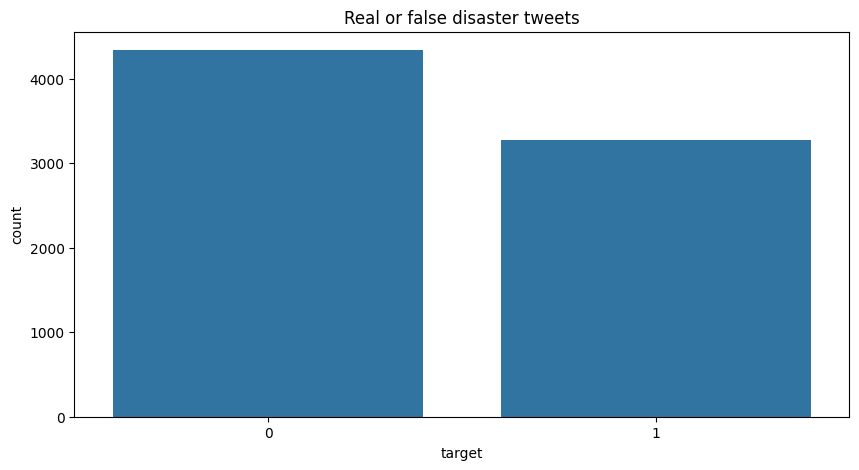

In [ ]:
sns.countplot(x='target', data=df)
plt.title('Real or false disaster tweets')

Text(0.5, 1.0, 'Real or false disaster tweets')

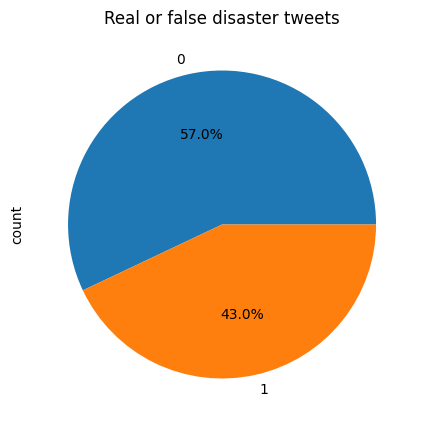

In [ ]:
df['target'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Real or false disaster tweets')

### 1.2.1 Number of characters in Tweets distribution

In [ ]:
!pip install git+https://github.com/muchlinski/nlp_utils.git

  Cloning https://github.com/muchlinski/nlp_utils.git to /tmp/pip-req-build-f2rabihk
  Running command git clone --filter=blob:none --quiet https://github.com/muchlinski/nlp_utils.git /tmp/pip-req-build-f2rabihk
  Resolved https://github.com/muchlinski/nlp_utils.git to commit 7f1bac10f09bedf7341c2eaecb91dfc9ca011dd1
  Preparing metadata (setup.py) ... done
  Created wheel for nlp_utils: filename=nlp_utils-0.0.4-py3-none-any.whl size=4123 sha256=0ed3219e14f80aba56df28ecafa3bf3e244d4f45a5d5f41d27c964187a32f53f
  Stored in directory: /tmp/pip-ephem-wheel-cache-nniivcxx/wheels/6f/41/b3/47f9c7e0a4558e0f6dad702ee1733b188afc0c75e7df69c845
Successfully built nlp_utils


In [ ]:
import nlp_utils

In [ ]:
df = nlp_utils.get_basic_features(df)
df.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,0,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0


Text(0.5, 1.0, 'Number of characters in Tweets distribution')

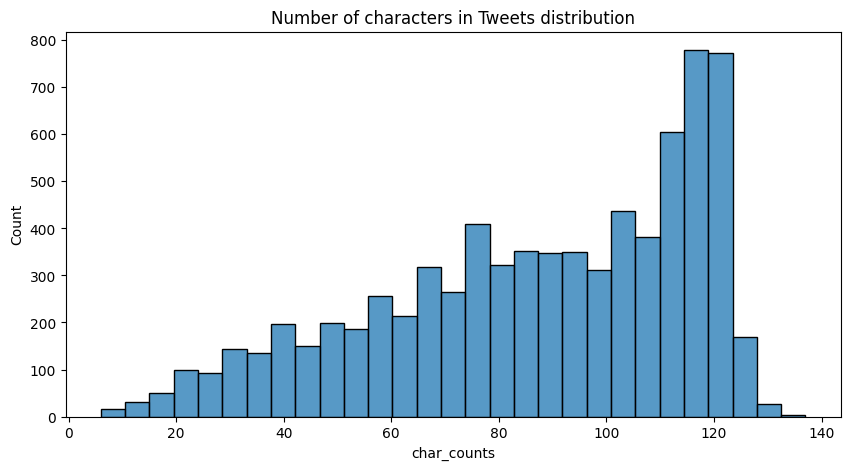

In [ ]:
sns.histplot(df['char_counts'])
plt.title('Number of characters in Tweets distribution')

Text(0.5, 1.0, 'Number of characters in Tweets distribution')

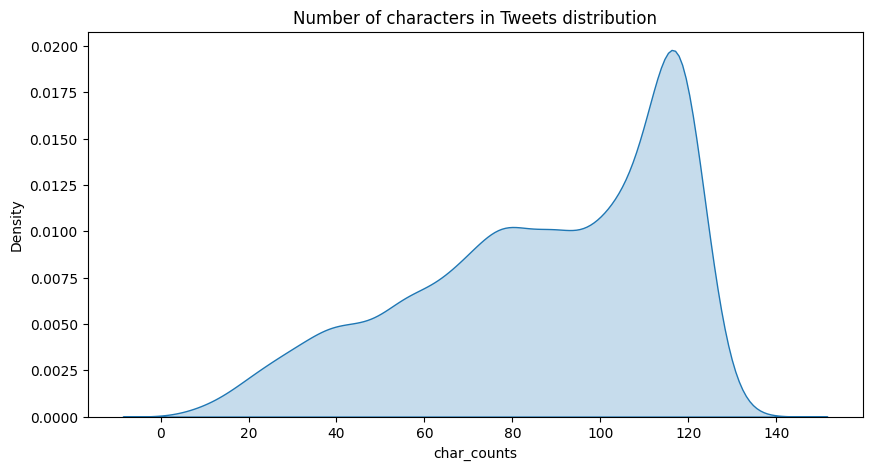

In [ ]:
sns.kdeplot(df['char_counts'], fill=True)
plt.title('Number of characters in Tweets distribution')

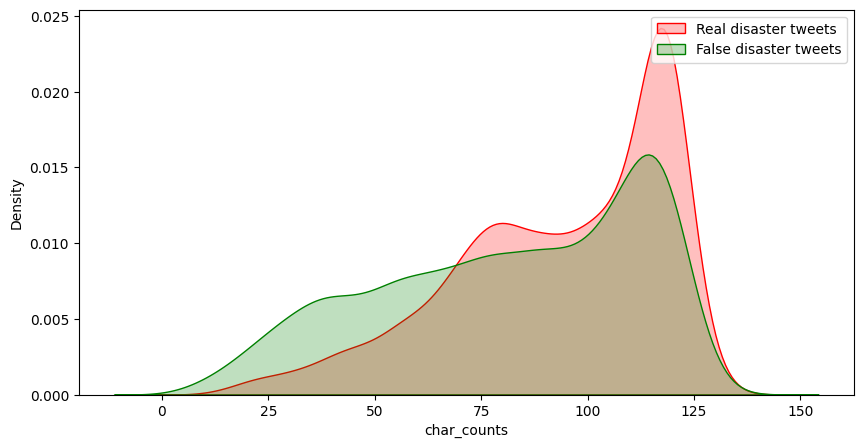

In [ ]:
sns.kdeplot(df[df['target']==1]['char_counts'], fill=True, label='Real disaster tweets', color='red')
sns.kdeplot(df[df['target']==0]['char_counts'], fill=True, label='False disaster tweets', color='green')
plt.legend()

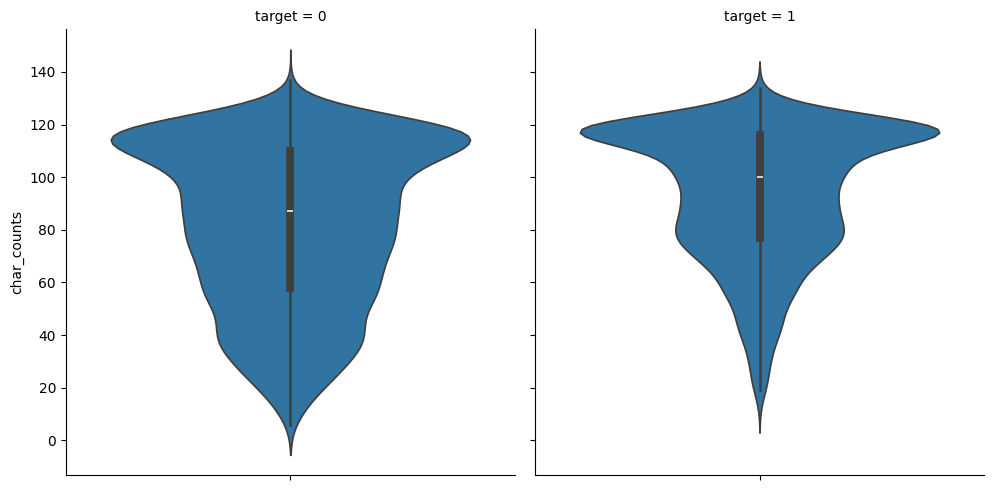

In [ ]:
sns.catplot(y='char_counts', data=df, kind='violin', col='target')

### 1.2.2. Number of words, avg words length, stop words distribution in Tweets

In [ ]:
def plot_column_distribution(df, col):
    plt.rcParams['figure.figsize'] = (10, 5)
    plt.rcParams['figure.dpi'] = 100
    sns.kdeplot(df[df['target']==1][col], fill=True, label='Disaster Tweets' ,color='red')
    sns.kdeplot(df[df['target']==0][col], fill=True, label='Non-Disaster Tweets', color='green')
    plt.title(f"Distribution of values in column {col}")
    plt.legend()

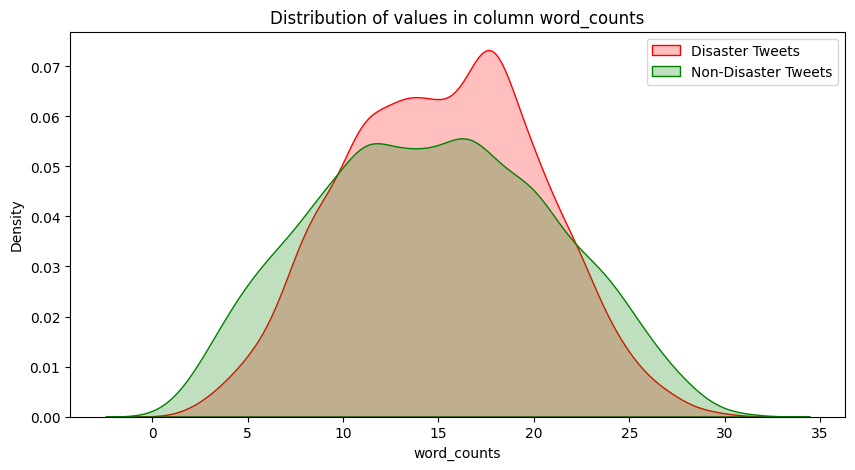

In [ ]:
plot_column_distribution(df, 'word_counts')

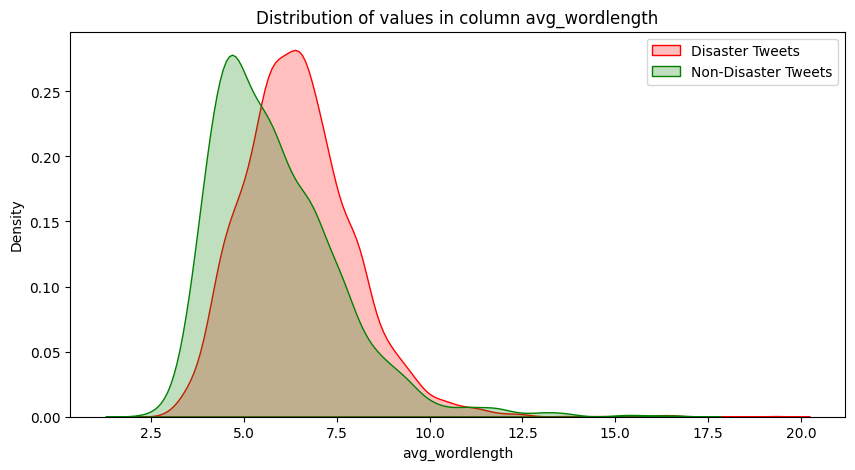

In [ ]:
plot_column_distribution(df, 'avg_wordlength')

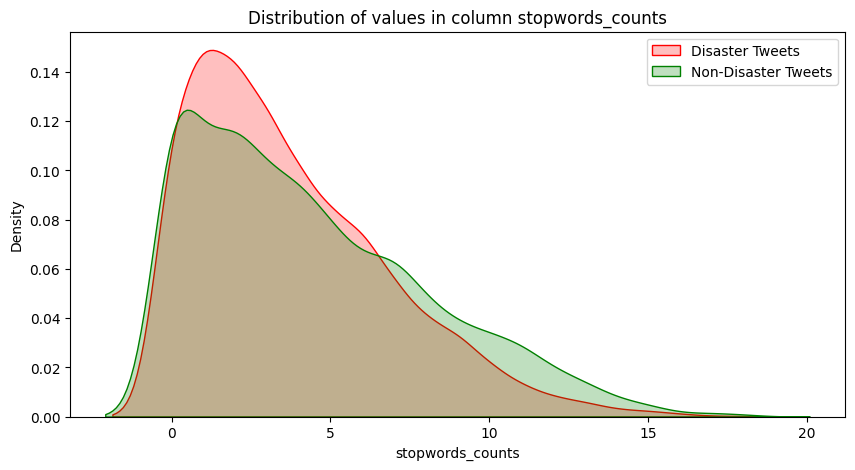

In [ ]:
plot_column_distribution(df, 'stopwords_counts')

### 1.2.3. Most and Least Common Words

In [ ]:
freqs = nlp_utils.get_value_counts(df, 'text')
top20 = freqs.head(20)
top20

,count
the,2575
a,1845
to,1805
in,1757
of,1722
and,1302
I,1197
for,820
is,814
on,773


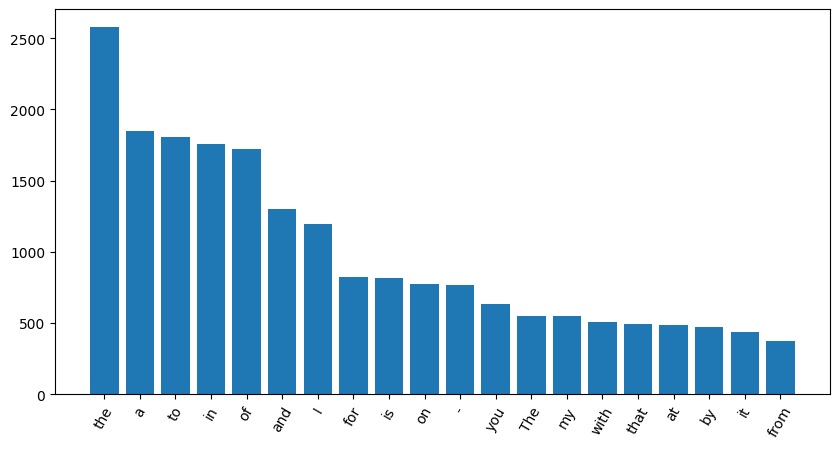

In [ ]:
plt.bar(top20.index, top20.values)
plt.xticks(rotation=60)
plt.show()

In [ ]:
least20 = freqs.tail(20)
least20

,count
http://t.co/JD7rIK7fX0,1
ft.åÊM.O.P.,1
http://t.co/ZDTz3RbS6w,1
'Detonate.',1
@ApolloBrown's,1
PLAY,1
missed.,1
detonate&amp;Shots,1
succeed,1
marines,1


## 2. One-Shot Data Cleaning

In [ ]:
df = pd.read_csv('train.csv')
df['text'] = df['text'].apply(lambda x: nlp_utils.get_clean(x))
df.head()

/usr/local/lib/python3.10/dist-packages/nlp_utils/utils.py:185: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1


## 3. Disaster Words Visualization with Word Cloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
real = nlp_utils.get_value_counts(df[df['target']==1], 'text')
real = ' '.join(real.index)
real

'httpt the in a of to and is on for i at by from it that with not after this fire you are was as have news httpst my over up more via an thisaster were be california suicide no has police people who but when been like killed do 2 will hiroshima just than fires storm crash families we train now into so out emergency s about bomb buildings all there am two mh370 they attack nuclear video wildfire accident your what get bombing one burning northern how dead legionnaires me bomber pm homes if some war car new still atomic obama he fatal years us off may collapse forest watch debris 1 japan malaysia first latest man mass or water today near severe had confirmed earthquake those u would oil found spill world army down 70 floods city warning under home injured weather could 4 wreckage 3 outbreak derailment evacuation migrants 40 saudi thunderstorm being old our can missing during flood flooding investigators say bridge their state suspect her mosque death back island charged kills wounded are

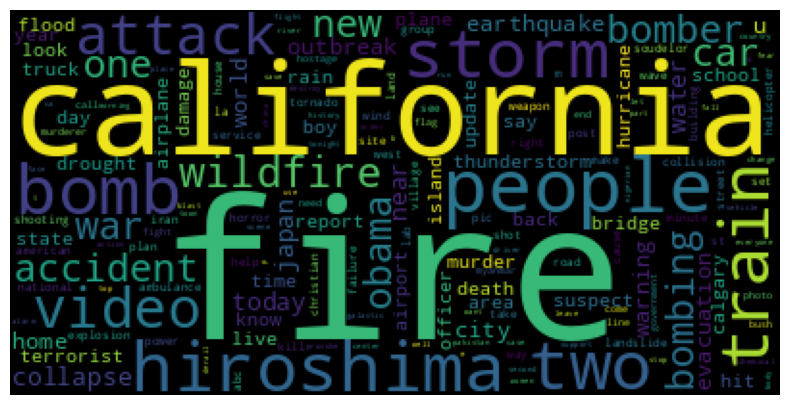

In [ ]:
word_cloud = WordCloud(max_font_size=100).generate(real)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [ ]:
not_real = nlp_utils.get_value_counts(df[df['target']==0], 'text')
not_real = ' '.join(not_real.index)
not_real

'httpt the i a to and of is in you my it for not on that with this have be am httpst are me your like do so by at just was but will up out he all if from new get as they we has or no when now would about what an how one can there body 2 via her been into his video more us people love back why got know time emergency them full see who after day 3 youtube going cannot did still some fire let go good she had think want man off our should lol world over then life their youre first last burning way make need too really reddit because only news than work being here best much even many take help could wreck 5 say him were right content black its u great feel hot please never every 4 look im 1 down ass fear today cross ever god bags read fucking does top bag come night these getting year without any everyone another may screaming panic death liked bloody ruin shit always wrecked smoke bad buildings explode face coming school harm w thisaster most well crash where home uo military watch check s

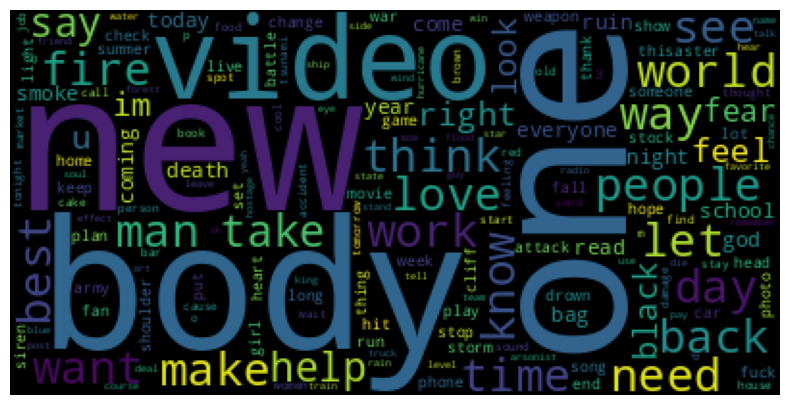

In [ ]:
word_cloud = WordCloud(max_font_size=100).generate(not_real)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

## 4. Classification with TFIDF and SVM

### 4.1. Training process

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

In [ ]:
text = df['text']
y = df['target']
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)
X.shape

(7613, 22600)

In [ ]:
X

<7613x22600 sparse matrix of type '<class 'numpy.float64'>'
	with 106513 stored elements in Compressed Sparse Row format>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
def run_SVM(clf, X_train, X_test, y_train, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print('\nClassification Report')
  print(classification_report(y_test, y_pred))

In [ ]:
%%time
clf = LinearSVC()
run_SVM(clf, X_train, X_test, y_train, y_test)



Classification Report
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       869
           1       0.82      0.69      0.75       654

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.80      0.80      1523

CPU times: user 57.6 ms, sys: 1.18 ms, total: 58.8 ms
Wall time: 146 ms


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


### 4.2. Test on competition data

In [ ]:
df_test = pd.read_csv('test.csv')
df_test['text'] = df_test['text'].apply(lambda x: nlp_utils.get_clean(x))
X_submission_test = tfidf.transform(df_test['text'])
y_submission_pred = clf.predict(X_submission_test)
df_test['target'] = y_submission_pred
df_test[['id', 'target']].to_csv('predictions_svm_tfidf.csv', index=False)
df_test.head()

/usr/local/lib/python3.10/dist-packages/nlp_utils/utils.py:185: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


,id,keyword,location,text,target
0,0,NaN,NaN,just happened a terrible car crash,0
1,2,NaN,NaN,heard about earthquake is different cities sta...,1
2,3,NaN,NaN,there is a forest fire at spot pond geese are ...,1
3,9,NaN,NaN,apocalypse lighting spokane wildfires,1
4,11,NaN,NaN,typhoon soudelor kills 28 in china and taiwan,1


## 5. Classification with Word2Vec and SVM

### 5.1. Training process

In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import en_core_web_lg
import numpy as np

In [ ]:
nlp = en_core_web_lg.load()

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
x = 'apple oragne cloud'
doc = nlp(x)
doc.vector.shape

(300,)

In [ ]:
def get_vec(x):
    return nlp(x).vector

In [ ]:
df['vec'] = df['text'].apply(lambda x: get_vec(x))
df.head()

,id,keyword,location,text,target,vec
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,"[-0.8476947, 0.8888447, -3.10391, 0.090650745,..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,"[-0.35491997, -1.5415528, -2.0926642, -0.49523..."
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,"[-2.8959212, 0.6998072, -2.5640087, 1.2561336,..."
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,"[-2.3889112, -0.6061475, -2.453201, 1.5150287,..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,"[-0.8628482, -0.2587669, -2.5594664, 0.3031685..."


In [ ]:
X = df['vec'].to_numpy()
X = X.reshape(-1, 1)
X.shape

(7613, 1)

In [ ]:
X = np.concatenate(np.concatenate(X, axis=0), axis=0).reshape(-1, 300)
X.shape

(7613, 300)

In [ ]:
y = df['target']
y.shape

(7613,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
%%time
clf = LinearSVC()
run_SVM(clf, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



Classification Report
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       869
           1       0.81      0.65      0.72       654

    accuracy                           0.78      1523
   macro avg       0.79      0.77      0.77      1523
weighted avg       0.79      0.78      0.78      1523

CPU times: user 7.32 s, sys: 40.7 ms, total: 7.36 s
Wall time: 7.42 s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 5.2. Test on competition data

In [ ]:
df_test = pd.read_csv('test.csv')
df_test['text'] = df_test['text'].apply(lambda x: nlp_utils.get_clean(x))
df_test['vec'] = df_test['text'].apply(lambda x: get_vec(x))
X_submission_test = df_test['vec'].to_numpy()
X_submission_test = X_submission_test.reshape(-1, 1)
X_submission_test = np.concatenate(np.concatenate(X_submission_test, axis=0), axis=0).reshape(-1, 300)
y_submission_pred = clf.predict(X_submission_test)
df_test['target'] = y_submission_pred
df_test[['id', 'target']].to_csv('predictions_svm_word2vec.csv', index=False)
df_test.head()

/usr/local/lib/python3.10/dist-packages/nlp_utils/utils.py:185: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


,id,keyword,location,text,vec,target
0,0,NaN,NaN,just happened a terrible car crash,"[-0.34527847, 2.3077183, -3.6164331, -1.702583...",1
1,2,NaN,NaN,heard about earthquake is different cities sta...,"[-0.10419747, 1.3204834, -2.9766479, -0.977315...",0
2,3,NaN,NaN,there is a forest fire at spot pond geese are ...,"[-0.93983954, 1.9616524, -3.8006356, -0.161559...",1
3,9,NaN,NaN,apocalypse lighting spokane wildfires,"[-1.0127801, 0.44750503, -2.9014, -0.8062625, ...",1
4,11,NaN,NaN,typhoon soudelor kills 28 in china and taiwan,"[-1.7055237, -3.3840938, -1.6585416, 0.6753698...",1


## 6. Word Embeddings and Classification wtih Deep Learning

### 6.1. Training process

#### 6.1.1 Data preparation

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout, Bidirectional, LSTM, BatchNormalization, Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [ ]:
text = df['text']
text

,text
0,our deeds are the reason of this earthquake ma...
1,forest fire near la ronge sask canada
2,all residents asked to shelter in place are be...
3,130 people receive wildfires evacuation orders...
4,just got sent this photo from ruby alaska as s...
...,...
7608,two giant cranes holding a bridge collapse int...
7609,aria ahrary thetawniest the out of control wil...
7610,m1 94 0104 utc5km s of volcano hawaii httpt co...
7611,police investigating after an ebike collided w...


In [ ]:
token = Tokenizer()
token.fit_on_texts(text)

In [ ]:
vocab_size = len(token.word_index) + 1
vocab_size

22637

In [ ]:
print(token.word_index)

{'httpt': 1, 'the': 2, 'a': 3, 'in': 4, 'to': 5, 'of': 6, 'i': 7, 'and': 8, 'is': 9, 'you': 10, 'for': 11, 'on': 12, 'it': 13, 'my': 14, 'not': 15, 'that': 16, 'with': 17, 'at': 18, 'by': 19, 'this': 20, 'have': 21, 'are': 22, 'from': 23, 'be': 24, 'was': 25, 'httpst': 26, 'like': 27, 'do': 28, 'am': 29, 'as': 30, 'up': 31, 'your': 32, 'so': 33, 'me': 34, 'just': 35, 'but': 36, 'will': 37, 'out': 38, 'has': 39, 'after': 40, 'no': 41, 'all': 42, 'fire': 43, 'an': 44, 'when': 45, 'if': 46, 'he': 47, 'we': 48, 'get': 49, 'they': 50, 'new': 51, 'now': 52, 'via': 53, 'more': 54, 'about': 55, 'or': 56, 'what': 57, 'people': 58, 'how': 59, 'one': 60, 'been': 61, 'there': 62, '2': 63, 'over': 64, 'news': 65, 'would': 66, 'who': 67, 'into': 68, 'were': 69, 'video': 70, 'can': 71, 'emergency': 72, 'thisaster': 73, 'us': 74, 'police': 75, 'than': 76, 'her': 77, 'some': 78, 'still': 79, 'his': 80, 'body': 81, 'back': 82, 'burning': 83, 'california': 84, 'crash': 85, '3': 86, 'suicide': 87, 'storm'

In [ ]:
encoded_text = token.texts_to_sequences(text)
print(encoded_text)

[[107, 4509, 22, 2, 857, 6, 20, 239, 127, 1679, 4510, 74, 42], [178, 43, 216, 753, 6825, 6826, 1327], [42, 1680, 1548, 5, 2063, 4, 648, 22, 121, 6827, 19, 1681, 41, 429, 246, 56, 2063, 4, 648, 1328, 22, 1045], [2819, 58, 4511, 1329, 246, 1328, 4, 84], [35, 90, 1154, 20, 309, 23, 6828, 2064, 30, 255, 23, 1329, 6829, 68, 3, 181], [2820, 386, 84, 1549, 783, 819, 4, 631, 6830, 529, 5, 1099, 368, 43, 4512, 1329], [217, 73, 820, 276, 1155, 821, 240, 6, 1682, 4, 6831, 988, 2351, 1550], [7, 29, 12, 218, 6, 2, 1866, 8, 7, 71, 103, 3, 43, 4, 2, 4513], [62, 9, 44, 72, 246, 1233, 52, 4, 2, 581, 822, 2, 694], [7, 29, 2352, 16, 2, 482, 9, 232, 5, 107, 349], [582, 58, 605, 23, 2, 277, 460, 33, 606], [823, 607, 2821, 9, 210, 2822, 3479, 649, 3, 650, 7, 192, 4, 607, 2821, 57, 29, 7, 296, 28, 57, 29, 7, 296, 28, 6832, 240], [2823, 240, 2065, 6833, 2821, 1432, 56, 1867, 608, 7, 21, 723, 3480], [217, 4, 4514, 900, 48, 1683, 4514], [233, 5, 181, 387, 12, 2353, 4, 4515, 122, 85, 350], [632, 31, 95], [7, 108

In [ ]:
longest_text = max(encoded_text, key=len)
len(longest_text)

32

In [ ]:
max_length = len(longest_text) + 10
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')
print(X)

[[ 107 4509   22 ...    0    0    0]
 [ 178   43  216 ...    0    0    0]
 [  42 1680 1548 ...    0    0    0]
 ...
 [2719 2302 4501 ...    0    0    0]
 [  75 1085   40 ...    0    0    0]
 [   2  200   54 ...    0    0    0]]


In [ ]:
X.shape

(7613, 42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

#### 6.1.2 Base model

In [ ]:
vec_size = 100

model_base = Sequential()
model_base.add(Embedding(vocab_size, vec_size, input_length=max_length))
model_base.add(Conv1D(32, 2, activation='relu'))
model_base.add(MaxPooling1D(2))
model_base.add(Dropout(0.5))
model_base.add(Dense(32, activation='relu'))
model_base.add(Dropout(0.5))
model_base.add(Dense(16, activation='relu'))
model_base.add(GlobalMaxPooling1D())
model_base.add(Dense(1, activation='sigmoid'))
model_base.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### 6.1.3 Model with an Additional Conv1D Layer
This model adds an extra Conv1D layer to enhance the model's ability to detect more complex patterns.

In [ ]:
vec_size = 100

model_conv1d = Sequential()
model_conv1d.add(Embedding(vocab_size, vec_size, input_length=max_length))
model_conv1d.add(Conv1D(32, 2, activation='relu'))
model_conv1d.add(MaxPooling1D(2))
model_conv1d.add(Dropout(0.5))
model_conv1d.add(Conv1D(64, 3, activation='relu'))
model_conv1d.add(MaxPooling1D(2))
model_conv1d.add(Dropout(0.5))
model_conv1d.add(Dense(32, activation='relu'))
model_conv1d.add(Dense(16, activation='relu'))
model_conv1d.add(GlobalMaxPooling1D())
model_conv1d.add(Dense(1, activation='sigmoid'))

model_conv1d.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### 6.1.4 Model with a Bidirectional LSTM Layer
This model replaces the Conv1D layer with a Bidirectional LSTM layer to better capture the sequential context of tweets.

In [ ]:
vec_size = 100

model_bilstm = Sequential()
model_bilstm.add(Embedding(vocab_size, vec_size, input_length=max_length))
model_bilstm.add(Bidirectional(LSTM(64, return_sequences=True)))
model_bilstm.add(GlobalMaxPooling1D())
model_bilstm.add(Dropout(0.5))
model_bilstm.add(Dense(32, activation='relu'))
model_bilstm.add(Dropout(0.5))
model_bilstm.add(Dense(16, activation='relu'))
model_bilstm.add(Dense(1, activation='sigmoid'))

model_bilstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_2               │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### 6.1.5 Model with Batch Normalization
This model adds a BatchNormalization layer to stabilize and accelerate the learning process.

In [ ]:
vec_size = 100

model_batchnorm = Sequential()
model_batchnorm.add(Embedding(vocab_size, vec_size, input_length=max_length))
model_batchnorm.add(Conv1D(32, 2, activation='relu'))
model_batchnorm.add(MaxPooling1D(2))
model_batchnorm.add(Dropout(0.5))
model_batchnorm.add(BatchNormalization())
model_batchnorm.add(Dense(32, activation='relu'))
model_batchnorm.add(Dropout(0.5))
model_batchnorm.add(Dense(16, activation='relu'))
model_batchnorm.add(GlobalMaxPooling1D())
model_batchnorm.add(Dense(1, activation='sigmoid'))

model_batchnorm.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_3               │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### 6.1.6 Models evaluation

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [ ]:
def compile_fit_and_plot_model(model, X_train, X_test, y_train, y_test, epochs):
  config = model.get_config()
  clean_model = Sequential.from_config(config)
  clean_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  history = clean_model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))
  plot_learningCurve(history, epochs)
  return clean_model, history


Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.5580 - loss: 0.6863 - val_accuracy: 0.5706 - val_loss: 0.6753
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6150 - loss: 0.6506 - val_accuracy: 0.7794 - val_loss: 0.5080
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8237 - loss: 0.4171 - val_accuracy: 0.7971 - val_loss: 0.4622
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9014 - loss: 0.2618 - val_accuracy: 0.7748 - val_loss: 0.4836
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9364 - loss: 0.1676 - val_accuracy: 0.7676 - val_loss: 0.5245
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9664 - loss: 0.0948 - val_accuracy: 0.7374 - val_loss: 0.6023
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9777 - loss: 0.0640 - val_accuracy: 0.7275 - val_loss: 0.6606
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9854 - loss: 0.0429 - val_accuracy: 

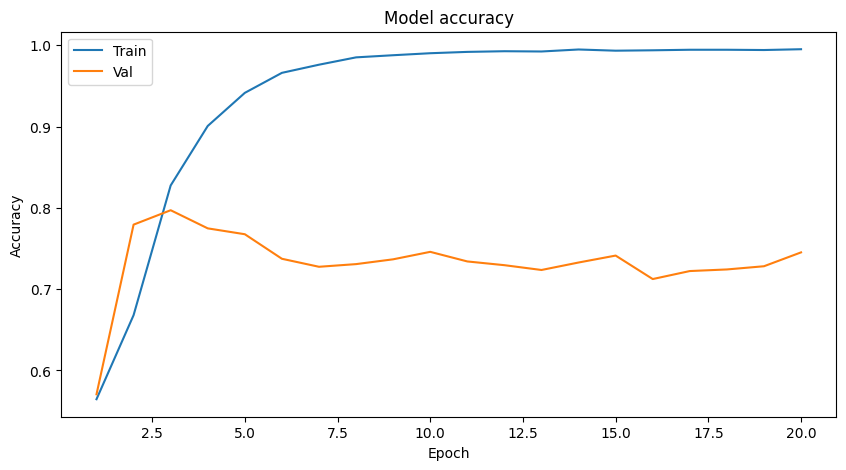

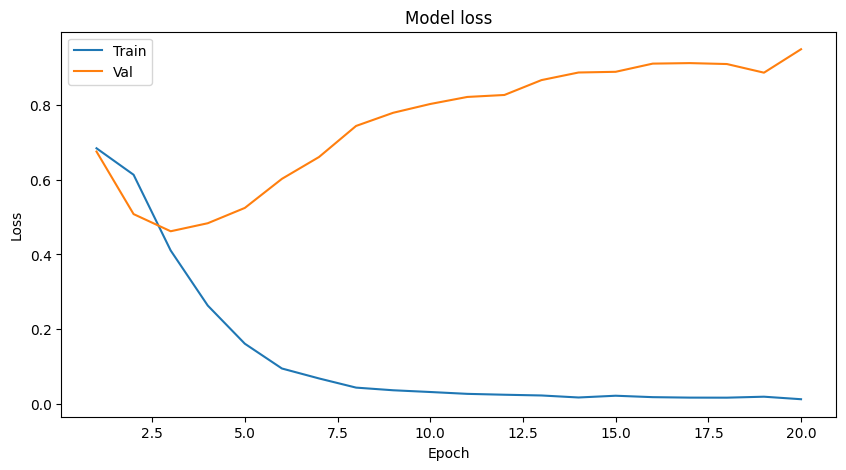

CPU times: user 22.5 s, sys: 1.48 s, total: 24 s
Wall time: 29.8 s


In [ ]:
%%time
trained_model_base, training_history_base = compile_fit_and_plot_model(model_base, X_train, X_test, y_train, y_test, 20)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5441 - loss: 0.6825 - val_accuracy: 0.7216 - val_loss: 0.6118
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7753 - loss: 0.5255 - val_accuracy: 0.8030 - val_loss: 0.4597
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8869 - loss: 0.2899 - val_accuracy: 0.7649 - val_loss: 0.5068
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9519 - loss: 0.1422 - val_accuracy: 0.7584 - val_loss: 0.6189
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9750 - loss: 0.0786 - val_accuracy: 0.7557 - val_loss: 0.6927
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9822 - loss: 0.0504 - val_accuracy: 0.7485 - val_loss: 0.8183
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9909 - loss: 0.0356 - val_accuracy: 0.7525 - val_loss: 0.8765
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0325 - val_accuracy: 0

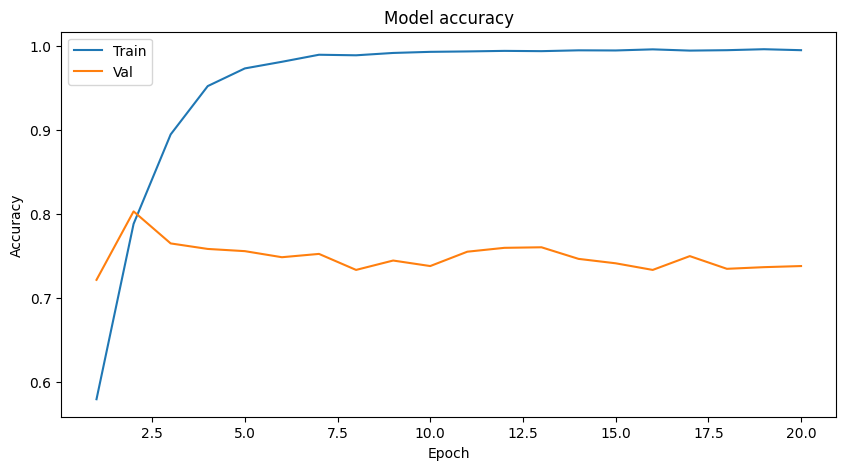

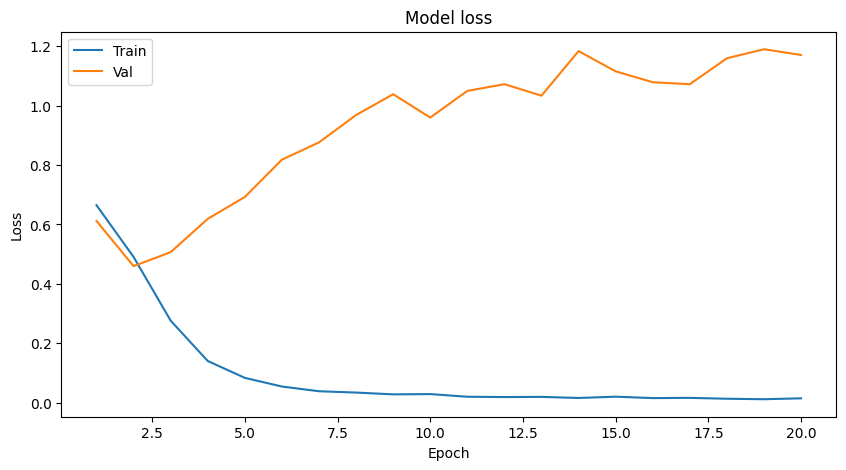

CPU times: user 22.8 s, sys: 1.31 s, total: 24.1 s
Wall time: 29.2 s


In [ ]:
%%time
trained_model_conv1d, training_history_conv1d = compile_fit_and_plot_model(model_conv1d, X_train, X_test, y_train, y_test, 20)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5774 - loss: 0.6767 - val_accuracy: 0.7420 - val_loss: 0.5504
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7956 - loss: 0.4661 - val_accuracy: 0.7984 - val_loss: 0.4611
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9206 - loss: 0.2441 - val_accuracy: 0.7708 - val_loss: 0.5662
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9736 - loss: 0.0958 - val_accuracy: 0.7571 - val_loss: 0.8412
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9864 - loss: 0.0492 - val_accuracy: 0.7426 - val_loss: 0.9497
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9891 - loss: 0.0304 - val_accuracy: 0.7262 - val_loss: 1.5652
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9896 - loss: 0.0313 - val_accuracy: 0.7380 - val_loss: 1.4125
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9928 - loss: 0.0276 - val_acc

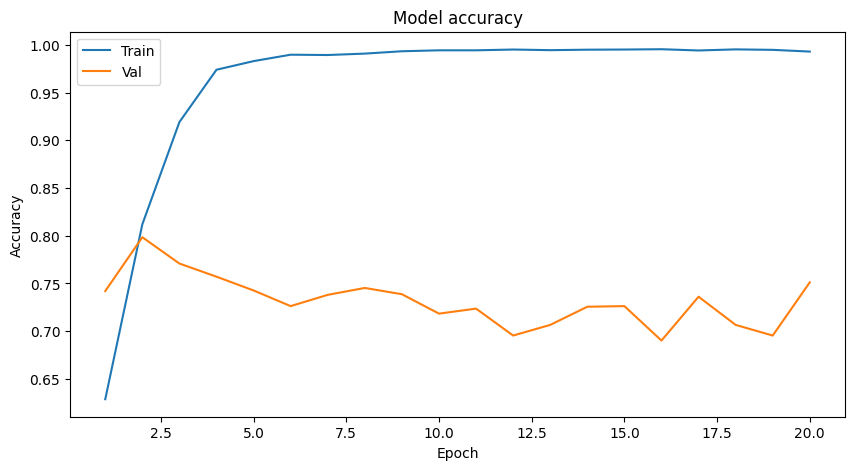

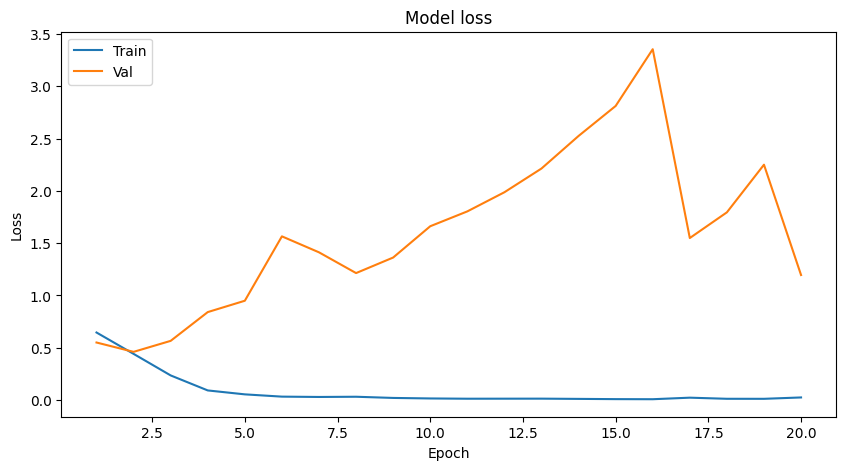

CPU times: user 1min, sys: 3.22 s, total: 1min 3s
Wall time: 1min 5s


In [ ]:
%%time
trained_model_bilstm, training_history_bilstm = compile_fit_and_plot_model(model_bilstm, X_train, X_test, y_train, y_test, 20)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.5703 - loss: 0.9285 - val_accuracy: 0.4294 - val_loss: 0.7065
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6815 - loss: 0.5991 - val_accuracy: 0.4931 - val_loss: 0.6599
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7901 - loss: 0.4729 - val_accuracy: 0.7039 - val_loss: 0.5525
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8576 - loss: 0.3566 - val_accuracy: 0.7039 - val_loss: 0.5564
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8944 - loss: 0.2686 - val_accuracy: 0.7269 - val_loss: 0.5385
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9219 - loss: 0.1961 - val_accuracy: 0.7584 - val_loss: 0.5466
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9420 - loss: 0.1594 - val_accuracy: 0.7459 - val_loss: 0.5775
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9620 - loss: 0.1123 - val_accuracy: 0

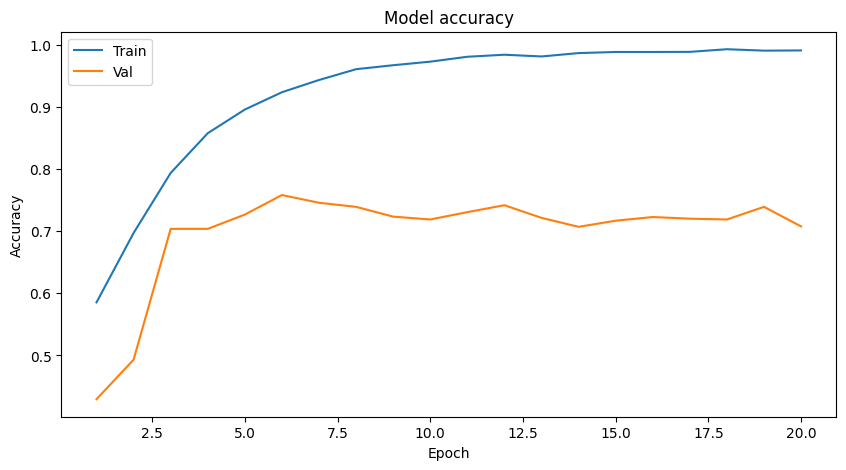

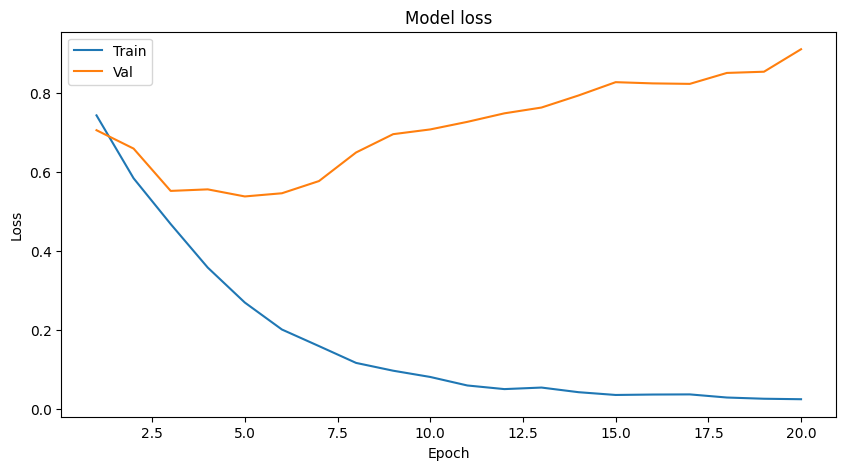

CPU times: user 21.9 s, sys: 1.3 s, total: 23.2 s
Wall time: 29.3 s


In [ ]:
%%time
trained_model_batchnorm, training_history_batchnorm = compile_fit_and_plot_model(model_batchnorm, X_train, X_test, y_train, y_test, 20)

#### 6.1.7 Best model training

Epoch 1/2
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5704 - loss: 0.6820 - val_accuracy: 0.7032 - val_loss: 0.6285
Epoch 2/2
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7512 - loss: 0.5621 - val_accuracy: 0.8050 - val_loss: 0.4566


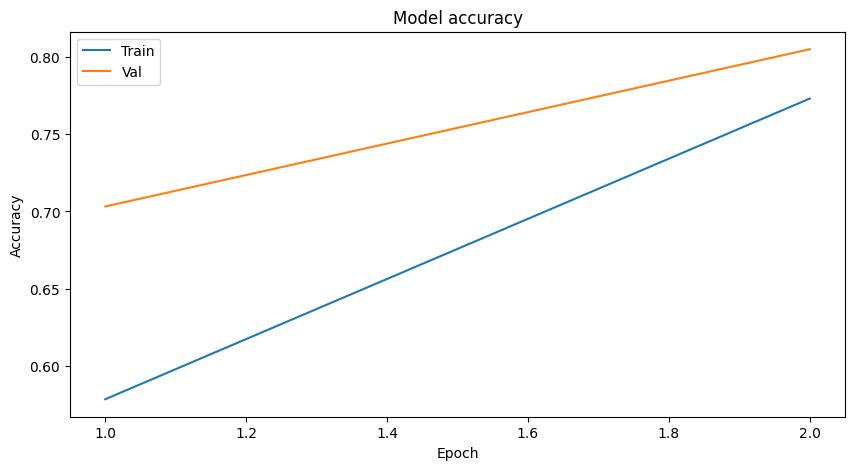

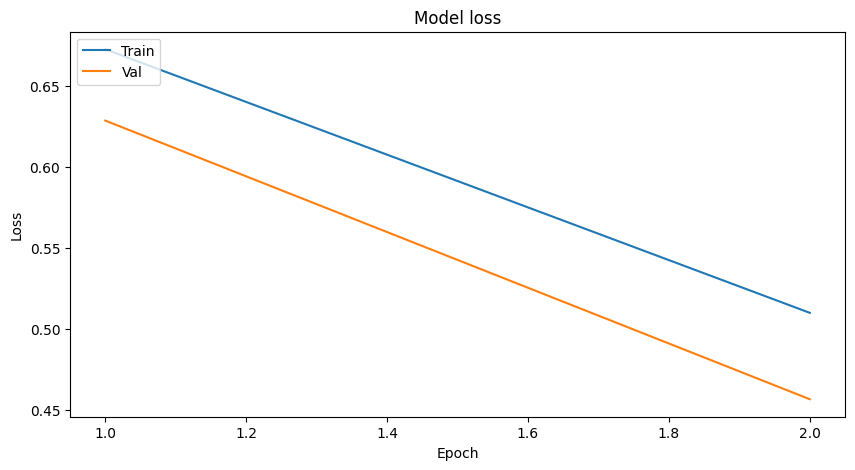

CPU times: user 9.37 s, sys: 453 ms, total: 9.82 s
Wall time: 9.23 s


In [ ]:
%%time
best_model, best_model_hisotry = compile_fit_and_plot_model(model_conv1d, X_train, X_test, y_train, y_test, 2)

### 6.2 Test on competition data

In [ ]:
def get_encoded(x):
  x = nlp_utils.get_clean(x)
  x = token.texts_to_sequences([x])
  x = pad_sequences(x, maxlen=max_length, padding='post')
  return x

In [ ]:
def get_binary_classification(prediction, threshold=0.5):
  if prediction > threshold:
    return 1
  else:
    return 0

#### 6.2.1 Sample data observation

In [ ]:
x = 'i am reportin earthquake in New York!'
vec = get_encoded(x)
vec

array([[  7,  29, 239,   4,  51, 977,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0]], dtype=int32)

In [ ]:
prediction = best_model.predict(vec)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


array([[0.5042148]], dtype=float32)

In [ ]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
sample_test_df = test_df.sample(100)
sample_test_df

,id,keyword,location,text
1756,5936,hazard,Hong Kong,Ibrahimovic &amp; Hazard Boot Test: Nike Mercu...
2824,9381,survived,NaN,How would you like to be remembered? ÛÓ On ho...
1600,5402,fire%20truck,New Jersey,Truck driver died in Turnpike fire most lanes ...
685,2226,chemical%20emergency,NaN,Standard behavior of Chemical Mixers so that E...
2181,7303,nuclear%20reactor,NaN,SEALED The Nuclear Regulatory Commission React...
...,...,...,...,...
800,2630,crashed,London,@PahandaBear @Nethaera Yup EU crashed too :P
3049,10096,typhoon,Edmonton,Striking views of Super Typhoon Soudelor as it...
1056,3458,derailed,"District of Columbia, USA",Train derailed at Smithsonian Metro. Sidewalks...
1514,5042,eyewitness,Land of the Free,With all due respect @RepMikeRogersAL y would ...


In [ ]:
sample_test_df['prediction'] = sample_test_df['text'].apply(lambda x: best_model.predict(get_encoded(x)))
sample_test_df

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/usr/local/lib/python3.10/dist-packages/nlp_utils/utils.py:185: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

,id,keyword,location,text,prediction
1756,5936,hazard,Hong Kong,Ibrahimovic &amp; Hazard Boot Test: Nike Mercu...,[[0.10555112]]
2824,9381,survived,NaN,How would you like to be remembered? ÛÓ On ho...,[[0.11172809]]
1600,5402,fire%20truck,New Jersey,Truck driver died in Turnpike fire most lanes ...,[[0.86728805]]
685,2226,chemical%20emergency,NaN,Standard behavior of Chemical Mixers so that E...,[[0.27341425]]
2181,7303,nuclear%20reactor,NaN,SEALED The Nuclear Regulatory Commission React...,[[0.21690531]]
...,...,...,...,...,...
800,2630,crashed,London,@PahandaBear @Nethaera Yup EU crashed too :P,[[0.27746648]]
3049,10096,typhoon,Edmonton,Striking views of Super Typhoon Soudelor as it...,[[0.77795345]]
1056,3458,derailed,"District of Columbia, USA",Train derailed at Smithsonian Metro. Sidewalks...,[[0.8938989]]
1514,5042,eyewitness,Land of the Free,With all due respect @RepMikeRogersAL y would ...,[[0.15519378]]


In [ ]:
sample_test_df['binary_prediction'] = sample_test_df['prediction'].apply(lambda x: get_binary_classification(x))
sample_test_df.sample(10)

,id,keyword,location,text,prediction,binary_prediction
1600,5402,fire%20truck,New Jersey,Truck driver died in Turnpike fire most lanes ...,[[0.86728805]],1
641,2092,casualty,NaN,charlie from casualty at the ashes https://t.c...,[[0.42614993]],0
251,816,battle,"Seraphim Vault, Cosmodrone",@exoticengram @TheRasputin That Raspy is so co...,[[0.17750885]],0
2376,7946,rainstorm,"Phoenix, AZ",Landslide in Italian Alps kills three: ROME (R...,[[0.9656182]],1
255,827,battle,Australia,#LonePine remembered around Australia as 'desc...,[[0.23417598]],0
2660,8884,smoke,kentucky,*anti cigarette smoking commercial comes on*\n...,[[0.16834293]],0
603,1970,burning%20buildings,San Diegohhjhhhhhghghpjg,What if we used drones to help firefighters le...,[[0.46332985]],0
2869,9514,terrorist,MAD as Hell,RT AbbsWinston: #Zionist #Terrorist kidnapped ...,[[0.8590347]],1
509,1667,bombing,NaN,Japan marks 70th anniversary of Hiroshima atom...,[[0.9887692]],1
129,411,apocalypse,Instagram:marissatunis,It's an apocalypse,[[0.4229385]],0


#### 6.2.3 Final Test data predictions

In [81]:
test_df['prediction'] = test_df['text'].apply(lambda x: best_model.predict(get_encoded(x)))
test_df['binary_prediction'] = test_df['prediction'].apply(lambda x: get_binary_classification(x))
test_df.sample(10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/usr/local/lib/python3.10/dist-packages/nlp_utils/utils.py:185: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

,id,keyword,location,text,prediction,binary_prediction
2749,9153,suicide%20bomber,NaN,qtSZg mhtw4fnet\n\nSuicide bomber kills 15 in ...,[[0.9501338]],1
51,167,aftershock,"Davis, CA",I want to go to Aftershock in October because ...,[[0.10650915]],0
820,2699,crush,"MNL, Philippines",omg I have a huge crush on her because of her ...,[[0.1103268]],0
552,1800,buildings%20on%20fire,New Hampshire Û¢ WMUR,Two buildings involved in fire on 2nd Street i...,[[0.9347534]],1
856,2809,cyclone,"Melbourne, Australia",An Appeal By Cardinal Charles Bo SDB ( CNUA) D...,[[0.24811053]],0
2290,7658,panic,NaN,@SixSecondCov he sounds more like panic at the...,[[0.0802599]],0
2664,8895,snowstorm,madrid,you're my snowstorm baby ??,[[0.20287876]],0
2599,8666,sinkhole,NYC,A Sinkhole caved in a Brooklyn Street today on...,[[0.86139905]],1
1380,4554,emergency%20plan,NaN,Calgary takes another beating from summer stor...,[[0.64267325]],1
2482,8293,rubble,London,Outrage as dog found buried alive in rubble ht...,[[0.67465657]],1


In [82]:
submission_df = test_df[['id', 'binary_prediction']]
submission_df.rename(columns={'binary_prediction': 'target'}, inplace=True)
submission_df.to_csv('predictions_deep_learning.csv', index=False)

<ipython-input-82-94e6e7d7f3fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_df.rename(columns={'binary_prediction': 'target'}, inplace=True)
